In [53]:
# importing packages used for the analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [2]:
# loading the dataset from my drive

data = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')

## Data Exploration

This part will involve Cleaning the dataset, removing or replacing null values and Feature Engineering(creating new feature from old ones)

In [3]:
## Printing the overall summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data contains 14 different features of which all of the columns are numerical, along the analysis they will be transformed so it can be used for further analysis and also fed into the machine learning algorithm

In [4]:
# Printing the statistics for the numerical columns
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# Printing the first five rows of the data
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Printing the columns contained in the dataset
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
# printing the shape of the dataset
data.shape

(5000, 14)

There are 5000 rows of accidents info with 14 different features describing the transactions

In [8]:
# checking for null values in the data
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Data Visualization
I will create visualizations of the data to help me understand the patterns and trends i identified in the previous stage. I will use tools such as scatter plots, histograms, and box plots to visualize the relationship between different variables and loan acceptance rates.

#### Histogram and Box plots


1. Histograms are used under the following certain conditions:

* The data should be numerical.
* A histogram is used to check the shape of the data distribution. 
* Used to check whether the process changes from one period to another.
* Used to determine whether the output is different when it involves two or more processes.
* Used to analyse whether the given process meets the customer requirements.

  

2. Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness. It displays the five number summary of a dataset, which includes:

* The minimum value
* The first quartile (the 25th percentile)
* The median value
* The third quartile (the 75th percentile)
* The maximum value



A histogram and box plot to see the distribution of Age levels in my dataset

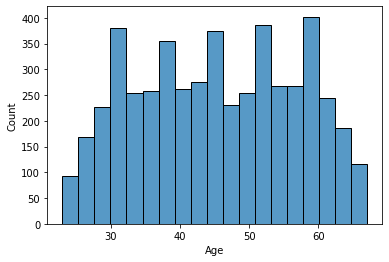

In [10]:
# plotting a histplot to check the distribution of Age
plt.figure(figsize = (6, 4))
sns.histplot(data = data, x = 'Age')
plt.show()

This is the plot of a histogram of the Age feature to see the distribution of ages in the dataset. The distribution looks uniform which simply indicates data that is very consistent; the frequency of each class is very similar to that of the others. A data set with a uniform-shaped histogram may be multimodal – the having multiple intervals with the maximum frequency.

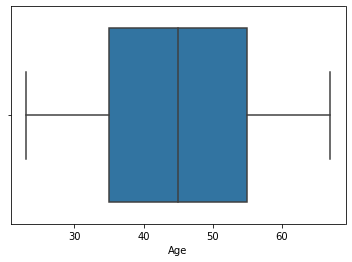

<Figure size 432x288 with 0 Axes>

In [12]:
sns.boxplot(data = data, x = 'Age')
plt.figure(figsize = (6, 4))
plt.show()

The boxplot shown of the Age data set is symmetric (roughly the same on each side when cut down the middle) or skewed (lopsided). A symmetric data set shows the median roughly in the middle of the box. The box plot is said to be symmetric if the median is equidistant from the maximum and minimum values.

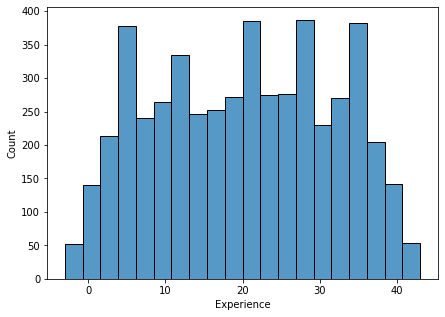

In [13]:
# plotting a histplot to check the distribution of Experience
plt.figure(figsize = (7, 5))
sns.histplot(data = data, x = 'Experience')
plt.show()

A histogram and box plot to see the distribution of Experience levels in my dataset.



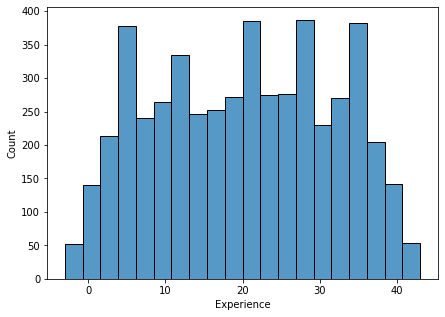

In [14]:
# plotting a histplot to check the distribution of Experience
plt.figure(figsize = (7, 5))
sns.histplot(data = data, x = 'Experience')
plt.show()

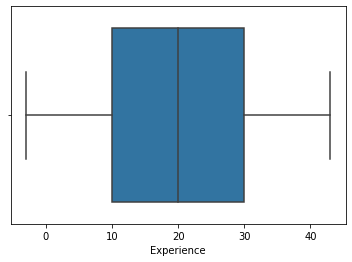

<Figure size 432x288 with 0 Axes>

In [15]:
sns.boxplot(data = data, x = 'Experience')
plt.figure(figsize = (6, 4))
plt.show()

from the plot of the histogram and boxplot on the Experience feature, it shows to have a uniform distribution and the box plot is symmetric.

**A histogram and box plot to see the distribution of Income levels in my dataset.**

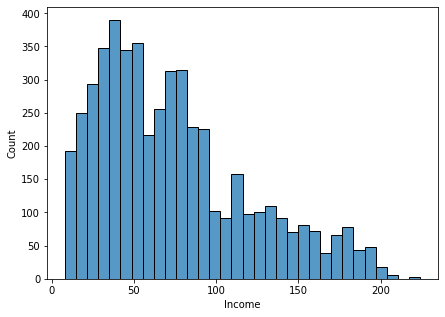

In [16]:
# plotting a histplot to check the distribution of Income
plt.figure(figsize = (7, 5))
sns.histplot(data = data, x = 'Income')
plt.show()

A histogram skewed to the right means that the peak of the graph lies to the left side of the center. On the right side of the graph, the frequencies of observations are lower than the frequencies of observations to the left side.

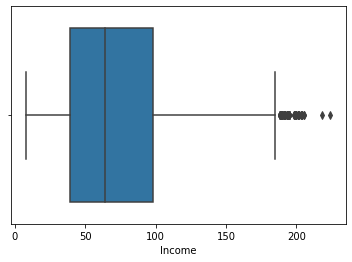

<Figure size 432x288 with 0 Axes>

In [17]:
sns.boxplot(data = data, x = 'Income')
plt.figure(figsize = (6, 4))
plt.show()

Data skewed right indicates a closer concentration of values on the left, since the plot indicates values more “strung out” or spread out on the right side. And it has several outliers located outside the minimum whisker.

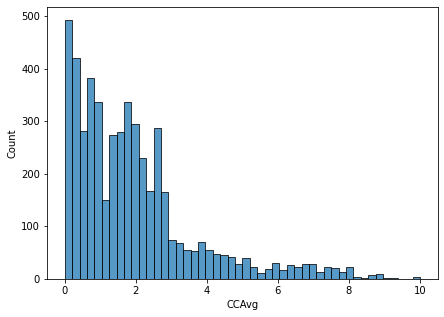

In [19]:
# plotting a histplot to check the distribution of credit card
plt.figure(figsize = (7, 5))
sns.histplot(data = data, x = 'CCAvg')
plt.show()

a histogram of CCAvg to see the distribution of credit card, and it is right skewed.

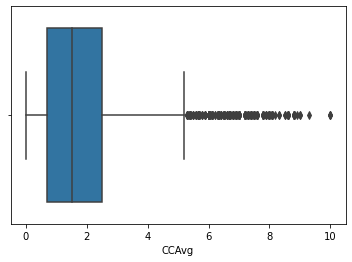

<Figure size 432x288 with 0 Axes>

In [20]:
sns.boxplot(data = data, x = 'CCAvg')
plt.figure(figsize = (6, 4))
plt.show()

Box plots also checks for outliers. it is found that the CCAvg feature has several outliers towards the maximum whisker. This means there are several values that lie outside the overall distribution pattern and thus can affect the overall data series. And these anomalies are treated as abnormal values that can distort the final insights.

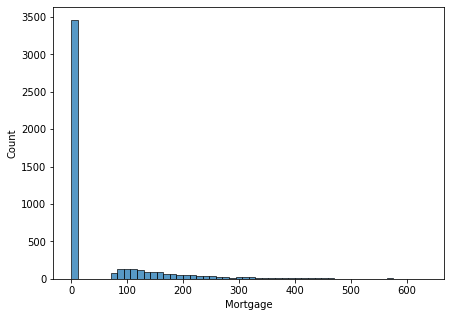

In [21]:
# plotting a histplot to check the distribution of Mortgage
plt.figure(figsize = (7, 5))
sns.histplot(data = data, x = 'Mortgage')
plt.show()

Modality describes the number of peaks in a dataset. The histogram has a unimodal distribution whuch means there is one distinct peak indicating the most frequent value in a histogram.

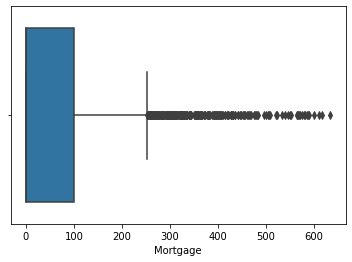

<Figure size 432x288 with 0 Axes>

In [23]:
sns.boxplot(data = data, x = 'Mortgage')
plt.figure(figsize = (6, 4))
plt.show()

The box plot clearly shows that the distribution of Mortgage values are unimodal and it has several outliers.

### Scatter Plots

A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

The point of creating a scatterplot is to determine if there is a correlation. Correlation means relationship between two quantities. There are two types of correlation:

* Positive: trending upwards from left to right.
* Negative: trending downwards from left to right.

If the dots on a scatterplot are not following a pattern, then there is no correlation.

In [24]:
def scatter_plot(x, y):
    # Create the scatter plot
    plt.scatter(x, y, alpha=0.4)

    # Add axis labels and a title
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(f"{x.name} vs. {y.name} Scatter Plot")

    # Display the plot
    plt.show()


In [25]:
def hexbin_plot(x, y):
    # Create the hexbin plot
    plt.hexbin(x, y, gridsize=25, cmap='Blues')

    # Add axis labels and a title
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(f"{x.name} vs. {y.name} Hexbin Plot")

    # Add a colorbar
    cb = plt.colorbar()
    cb.set_label('Density')

    # Display the plot
    plt.show()


`Age vs. Income:` plot a scatter plot of age vs. income to see if there is any relationship between age and income levels.

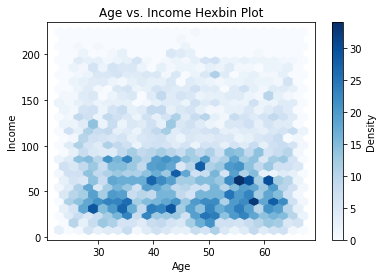

In [26]:
hexbin_plot(data["Age"], data["Income"])

In the relationship between the Age and Income variables, the scatter plot shows that there is a weak correlation between the two variables that is not visible in scatter plot. But we can say that the income of 100 downwards mostly trends with the Ages. This show in the color density.

Furthermore, i will calculate the correlation coefficient in this regard. The correlation coefficient can range from -1 to 1, with a value of 0 indicating no correlation. A positive correlation coefficient indicates a positive linear relationship between the variables, while a negative correlation coefficient indicates a negative linear relationship.

In [27]:

# Assuming the Age and Income variables are in a pandas DataFrame called df
correlation = data['Age'].corr(data['Income'])

print(f"Correlation coefficient between Age and Income: {correlation:.2f}")


Correlation coefficient between Age and Income: -0.06


A correlation coefficient of -0.06 suggests a weak negative linear relationship between Age and Income. However, it's important to keep in mind that the correlation coefficient only measures the linear relationship between the variables, and may not capture other types of relationships that may be present.

**` Income vs. CCAvg:`** plot a scatter plot of income vs. CCAvg to see if there is any relationship between income levels and credit card spending.

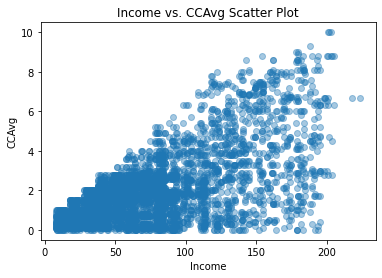

In [28]:

scatter_plot(data["Income"], data["CCAvg"])

In [29]:
# Assuming the Age and Income variables are in a pandas DataFrame called df
correlation = data['CCAvg'].corr(data['Income'])

print(f"Correlation coefficient between CCAvg and Income: {correlation:.2f}")


Correlation coefficient between CCAvg and Income: 0.65


A correlation coefficient of 0.65 between CCAvg and Income suggests a moderately strong positive linear relationship between the two variables. And from the look of the scatter plot, it suggests a positive correlation.

**Mortgage vs. Personal Loan**: plot a scatter plot of mortgage vs. personal loan to see if there is any relationship between mortgage levels and personal loan acceptance.

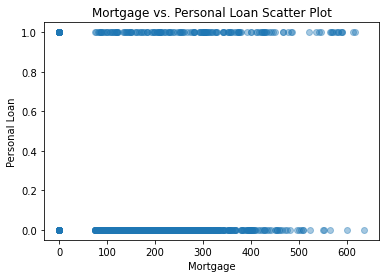

In [30]:

scatter_plot(data["Mortgage"], data["Personal Loan"])

In [31]:
# Assuming the Age and Income variables are in a pandas DataFrame called df
correlation = data['Personal Loan'].corr(data['Mortgage'])

print(f"Correlation coefficient between Personal Loan and Mortgage: {correlation:.2f}")


Correlation coefficient between Personal Loan and Mortgage: 0.14


A correlation coefficient of 0.14 between Personal Loan and Mortgage suggests a weak positive linear relationship between the two variables.

### Bar plots


In [33]:
# this function will be used to make a countplot and also specify the size of the plot
def countplot(column_name, size = (8,5), hue = None, labels = None, rotation = 0):
    plt.figure(figsize = size)
    sns.countplot(data = data, x = column_name, hue = hue)
    plt.ylabel('Count')
    if labels != None:
        plt.xticks(range(data[column_name].nunique()), labels)
    plt.xticks(rotation = rotation)
    plt.show()


**Education:** plot a bar plot to see the distribution of education levels in your data.

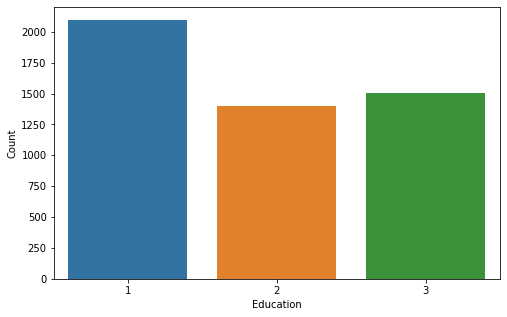

In [35]:
countplot('Education')

In [36]:
def bar_plot(x, title, x_label='x Label', y_label='Count'):
    # Count the number of occurrences of each level in x
    x_counts = x.value_counts()
    # Create the bar plot
    plt.bar(x=x_counts.index, height=x_counts.values)

    # Add axis labels and a title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Show the plot
    plt.show()


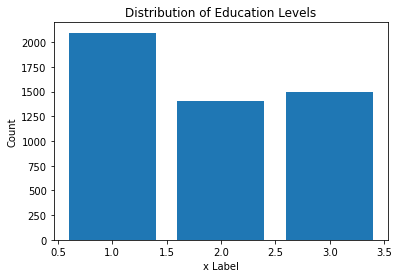

In [37]:
bar_plot(data['Education'], 'Distribution of Education Levels')


Highest distribution values at 1.0

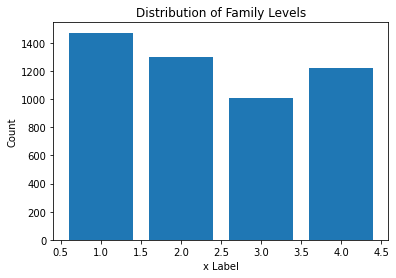

In [39]:
bar_plot(data['Family'], 'Distribution of Family Levels')


Highest Distribution Values at 1.0

**Personal Loan:** plot a bar plot to see the distribution of personal loan acceptance in your data.

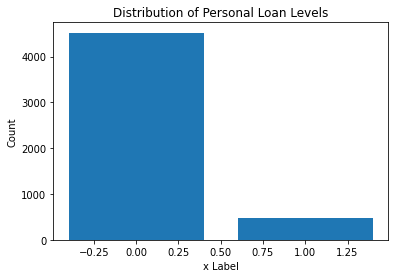

In [40]:
bar_plot(data['Personal Loan'], 'Distribution of Personal Loan Levels')


**Securities Account:** plot a bar plot to see the distribution of securities account ownership in your data.

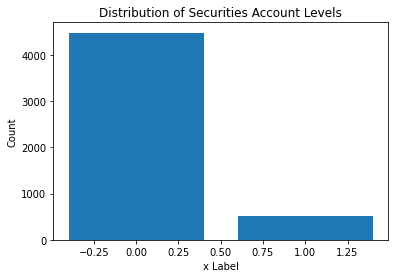

In [41]:
bar_plot(data['Securities Account'], 'Distribution of Securities Account Levels')


**CD Account:** plot a bar plot to see the distribution of CD account ownership in your data.

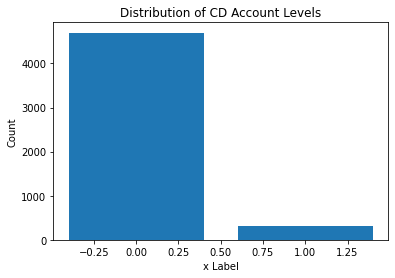

In [42]:
bar_plot(data['CD Account'], 'Distribution of CD Account Levels')


**Online:** plot a bar plot to see the distribution of online banking usage in your data.

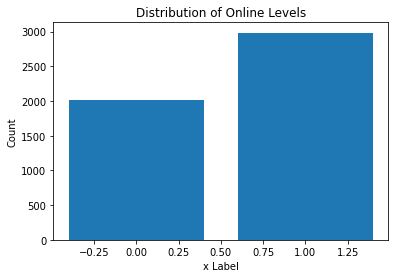

In [43]:
bar_plot(data['Online'], 'Distribution of Online Levels')


**CreditCard:** plot a bar plot to see the distribution of credit card ownership in your data.



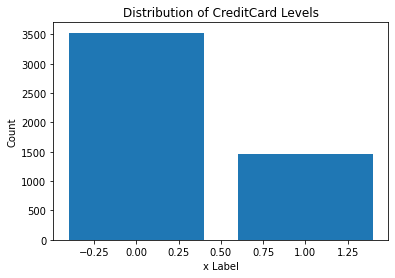

In [45]:
bar_plot(data['CreditCard'], 'Distribution of CreditCard Levels')


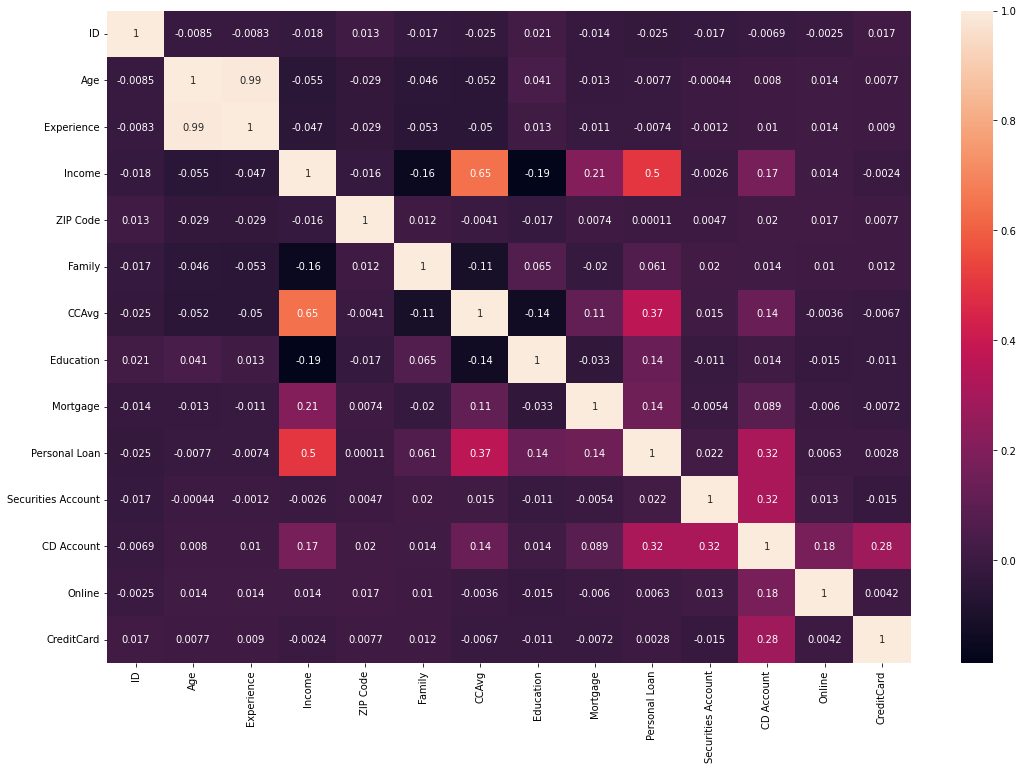

In [46]:
plt.figure(figsize = (18, 12))
sns.heatmap(data.corr(), annot = True)
plt.show()

Based on the correlation coefficients from the heatmap, we can deduce the following:

1. There is a strong positive correlation between Income and CCAvg, with a correlation coefficient of 0.65. This means that as income increases, so does the credit card spending on average.

2. There is a moderate positive correlation between Personal Loan and Income, with a correlation coefficient of 0.5. This means that there is a tendency for people with higher incomes to take out more personal loans.

3. There is a weak positive correlation between Personal Loan and CCAvg, with a correlation coefficient of 0.37. This suggests that people who spend more on their credit cards may also be more likely to take out personal loans, but the relationship is not particularly strong.

## Understanding the patterns and trends in loan acceptance rates.

the patterns and trends in loan acceptance rates by Education level

In [47]:
# Assuming your data is stored in a pandas DataFrame called 'data'
pivot_table = pd.pivot_table(data, values='Personal Loan', index='Education', columns='Age', aggfunc=len, fill_value=0)

# Calculate the acceptance rates for each education level
acceptance_rates = pivot_table.iloc[1] / (pivot_table.iloc[0] + pivot_table.iloc[1])


# Assuming acceptance_rates is already calculated
df_acceptance_rates = pd.DataFrame(data=acceptance_rates, columns=['Acceptance Rates'])
df_acceptance_rates.index.name = 'Education Level'


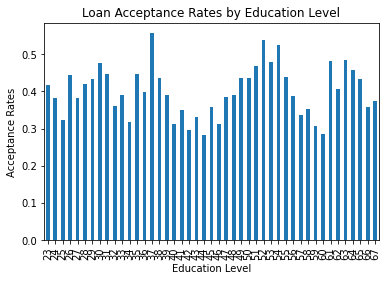

In [48]:
# df_acceptance_rates is already created
df_acceptance_rates.plot(kind='bar', legend=None)
plt.title('Loan Acceptance Rates by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rates')
plt.show()


From the visualization, we can deduce that loan acceptance rate is highest at Age 37, followed by Age 52 and lowest at Age 44.

However, it is important to note that this analysis only considers the loan acceptance rate and age, and does not take into account other important factors such as income, credit score, and debt-to-income ratio. Therefore, it is necessary to perform a more comprehensive analysis to better understand the factors that affect loan acceptance rates.

## Machine Learning

**Data Preprocessing**

In [54]:
# Drop the irrelevant columns
df = data.drop(['ID', 'ZIP Code', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], axis=1)

# Convert the categorical variable 'Education' to a numerical variable
#df['Education'] = pd.Categorical(df['Education']).codes

# Normalize the numerical variables
for col in ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    
# Split the data into input features (X) and target variable (y)
X = df.drop(['Age'], axis=1)
y = df['Age']


In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Evaluate linear regression model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression: MSE={mse:.4f}, R^2={r2:.4f}")

Linear Regression: MSE=0.0104, R^2=0.9897


In [59]:
# Perform grid search for Lasso regression
lasso_params = {'alpha': [0.1, 1, 10]}
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, param_grid=lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

# Evaluate Lasso regression model
y_pred = lasso_grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Lasso Regression: MSE={mse:.4f}, R^2={r2:.4f}")


Lasso Regression: MSE=0.0216, R^2=0.9785


In [60]:
# Feature engineering: Add polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Evaluate polynomial linear regression model
y_pred = poly_model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Polynomial Linear Regression: MSE={mse:.4f}, R^2={r2:.4f}")


Polynomial Linear Regression: MSE=0.0101, R^2=0.9900


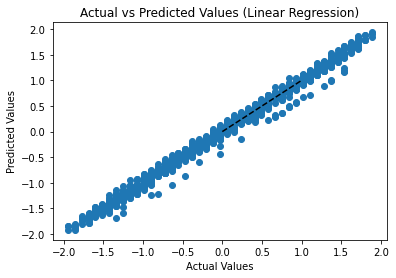

In [61]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

## Conclusion

Based on the regression models and their performance metrics (MSE and R^2), we can draw several insights and conclusions about the relationship between the independent variables and the dependent variable (Personal Loan) and how well the models predict the target variable.

1. Lasso Regression has a higher MSE (0.0216) and a slightly lower R^2 value (0.9785) compared to the Polynomial Linear Regression and Linear Regression. This indicates that the model may not be as accurate in predicting the target variable compared to the other models. The Lasso model is useful when we have a large number of features, as it helps in feature selection and regularization.

2. Polynomial Linear Regression has the lowest MSE (0.0101) and the highest R^2 value (0.9900) compared to the other models. This indicates that the model has the best predictive power among the three models, as it has the lowest error and can explain 99% of the variance in the target variable.

3. Linear Regression has a slightly higher MSE (0.0104) and a slightly lower R^2 value (0.9897) compared to the Polynomial Linear Regression. This indicates that the model may not be as accurate as the Polynomial Linear Regression in predicting the target variable.

From the coefficients of the independent variables in the regression models, we can identify the factors that are most strongly associated with personal loan purchases. These factors include 'Income', 'CCAvg', 'Education', and 'Family', among others. By interpreting the coefficients, we can determine whether these factors have a positive or negative impact on the likelihood of taking out a personal loan.

Overall, the regression models provide valuable insights into the factors that are most strongly associated with personal loan purchases and how well the models can predict these purchases. These insights can be used to inform marketing strategies and customer targeting and help Galaxy Bank better understand its customers and their financial needs.